# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Remove predictors with p-values too high and refit the model
* Examine and interpret the model results
* Split data into training and testing sets
* Fit a regression model to the data set using statsmodel library


## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)" then you need to further preprocess your column names.**

In [329]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from statsmodels.formula.api import ols
data = pd.read_csv('Lego_dataset_cleaned.csv')
data.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10+,ages_10-14,ages_10-16,ages_10-21,ages_11-16,ages_12+,ages_12-16,ages_14+,ages_16+,ages_1½-3,ages_1½-5,ages_2-5,ages_4+,ages_4-7,ages_4-99,ages_5+,ages_5-12,ages_5-8,ages_6+,ages_6-12,ages_6-14,ages_7+,ages_7-12,ages_7-14,ages_8+,ages_8-12,ages_8-14,ages_9+,ages_9-12,ages_9-14,ages_9-16,theme_name_Angry Birds™,theme_name_Architecture,theme_name_BOOST,...,theme_name_Minifigures,theme_name_NEXO KNIGHTS™,theme_name_NINJAGO®,theme_name_Power Functions,theme_name_Pteranodon Chase,theme_name_SERIOUS PLAY®,theme_name_Speed Champions,theme_name_Star Wars™,theme_name_Stygimoloch Breakout,theme_name_T. rex Transport,theme_name_THE LEGO® BATMAN MOVIE,theme_name_THE LEGO® NINJAGO® MOVIE™,theme_name_Technic,country_AT,country_AU,country_BE,country_CA,country_CH,country_CZ,country_DE,country_DN,country_ES,country_FI,country_FR,country_GB,country_IE,country_IT,country_LU,country_NL,country_NO,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very Challenging,review_difficulty_Very Easy,review_difficulty_unknown
0,-0.273020,29.99,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,-0.404154,19.99,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,-0.517242,12.99,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,0.635296,99.99,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,0.288812,79.99,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [330]:
data.columns[15].replace('½','333')

'ages_1333-3'

In [331]:
#Your code here - Manipulate column names
subs = [(' ', '_'),('.',''),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

data.columns = [col_formatting(i) for i in data.columns]

In [332]:
for i in data.columns:
    print(i)

piece_count
list_price
num_reviews
play_star_rating
star_rating
val_star_rating
ages_10plus
ages_10_14
ages_10_16
ages_10_21
ages_11_16
ages_12plus
ages_12_16
ages_14plus
ages_16plus
ages_1half_3
ages_1half_5
ages_2_5
ages_4plus
ages_4_7
ages_4_99
ages_5plus
ages_5_12
ages_5_8
ages_6plus
ages_6_12
ages_6_14
ages_7plus
ages_7_12
ages_7_14
ages_8plus
ages_8_12
ages_8_14
ages_9plus
ages_9_12
ages_9_14
ages_9_16
theme_name_Angry_Birds
theme_name_Architecture
theme_name_BOOST
theme_name_Blues_Helicopter_Pursuit
theme_name_BrickHeadz
theme_name_Carnotaurus_Gyrosphere_Escape
theme_name_City
theme_name_Classic
theme_name_Creator_3_in_1
theme_name_Creator_Expert
theme_name_DC_Comics_Super_Heroes
theme_name_DC_Super_Hero_Girls
theme_name_DIMENSIONS
theme_name_DUPLO
theme_name_Dilophosaurus_Outpost_Attack
theme_name_Disney
theme_name_Elves
theme_name_Friends
theme_name_Ghostbusters
theme_name_Ideas
theme_name_Indoraptor_Rampage_at_Lockwood_Estate
theme_name_Juniors
theme_name_Jurassic_Park_Veloci

In [333]:
#Your code here - Define the target and predictors
predictors = data.drop('list_price', axis=1)
target = data.list_price

In [334]:
#Your code here - Fit the actual model
predictor = '+'.join(predictors.columns)
formula = 'list_price'+'~'+predictor
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     726.2
Date:                Sat, 17 Aug 2019   Prob (F-statistic):               0.00
Time:                        12:55:31   Log-Likelihood:                -54056.
No. Observations:               10870   AIC:                         1.083e+05
Df Residuals:                   10775   BIC:                         1.090e+05
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           64.2821      1.551     41.435      0.000      61.241      67.323
piece_count                                         75.7184      0.776     97.605      0.000      74.198      77.239
num_reviews                                          6.4270      0.590     10.888      0.000       5.270       7.584
play_star_rating                                     5.2682      0.542      9.717      0.000       4.205       6.331
star_rating                                         -1.4380      0.617     -2.331      0.020      -2.647      -0.229
val_star_rating                                     -8.5504      0.550    -15.545      0.000      -9.628      -7.472
ages_10plus                                        122.9923      5.753     21.378      0.000     111.715     134.270
ages_10_14                                         -23.1648      7.788     -2.975      0.003     -38.430      -7.899
ages_10_16                                         -11.7969      3.528     -3.343      0.001     -18.713      -4.881
ages_10_21                                          55.9674      6.415      8.725      0.000      43.393      68.542
ages_11_16                                         -18.2277      5.058     -3.604      0.000     -28.141      -8.314
ages_12plus                                         70.5837      4.828     14.619      0.000      61.119      80.048
ages_12_16                                         -57.4333      5.882     -9.765      0.000     -68.962     -45.904
ages_14plus                                         24.6493      3.579      6.887      0.000      17.634      31.665
ages_16plus                                         32.9512      5.251      6.275      0.000      22.658      43.245
ages_1half_3                                        -9.0486      2.087     -4.336      0.000     -13.139      -4.958
ages_1half_5                                        -4.1380      2.605     -1.588      0.112      -9.244       0.969
ages_2_5                                            14.9724      1.459     10.260      0.000      12.112      17.833
ages_4plus                                         -18.5801      5.504     -3.376      0.001     -29.370      -7.791
ages_4_7                                            -6.1664      2.909     -2.120      0.034     -11.868      -0.465
ages_4_99                                           -3.0337      3.138     -0.967      0.334      -9.185       3.118
ages_5plus                                          -9.6179      2.705     -3.556      0.000     -14.920      -4.316
ages_5_12                                          -34.9818      2.739    -12.771      0.000     -40.351     -29.613
ages_5_8                                 

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [335]:
#Your code here - Remove features which do not appear to be statistically relevant
tables = model.summary()
table = pd.DataFrame(tables.tables[1].data)
table.columns = table.iloc[0,:]
table.drop(0, inplace=True)
table.set_index(table.columns[0], inplace=True)
table.head()

,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,64.2821,1.551,41.435,0.000,61.241,67.323
piece_count,75.7184,0.776,97.605,0.000,74.198,77.239
num_reviews,6.4270,0.590,10.888,0.000,5.270,7.584
play_star_rating,5.2682,0.542,9.717,0.000,4.205,6.331
star_rating,-1.4380,0.617,-2.331,0.020,-2.647,-0.229


In [336]:
rel_params = [i for i in table.index if float(table.loc[i,'P>|t|'])<0.05]
rel_params.remove('Intercept')
predictor = '+'.join(rel_params)
formula = 'list_price'+'~'+predictor
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     910.4
Date:                Sat, 17 Aug 2019   Prob (F-statistic):               0.00
Time:                        12:55:31   Log-Likelihood:                -54063.
No. Observations:               10870   AIC:                         1.083e+05
Df Residuals:                   10794   BIC:                         1.088e+05
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           64.7562      2.106     30.747      0.000      60.628      68.884
piece_count                                         75.7688      0.763     99.312      0.000      74.273      77.264
num_reviews                                          6.5022      0.585     11.111      0.000       5.355       7.649
play_star_rating                                     5.4112      0.531     10.190      0.000       4.370       6.452
star_rating                                         -1.4588      0.606     -2.406      0.016      -2.647      -0.271
val_star_rating                                     -8.4947      0.528    -16.084      0.000      -9.530      -7.459
ages_10plus                                        128.2005      6.586     19.465      0.000     115.291     141.110
ages_10_14                                         -19.3577      8.201     -2.360      0.018     -35.434      -3.281
ages_10_16                                          -8.7326      3.680     -2.373      0.018     -15.947      -1.519
ages_10_21                                          61.6708      7.062      8.733      0.000      47.829      75.513
ages_11_16                                         -15.5409      5.126     -3.032      0.002     -25.590      -5.492
ages_12plus                                         75.0700      5.737     13.085      0.000      63.824      86.316
ages_12_16                                         -54.0781      6.335     -8.536      0.000     -66.496     -41.660
ages_14plus                                         28.5356      4.315      6.613      0.000      20.078      36.993
ages_16plus                                         36.2814      6.010      6.037      0.000      24.501      48.061
ages_1half_3                                        -3.6613      3.116     -1.175      0.240      -9.769       2.446
ages_2_5                                            20.0271      2.309      8.673      0.000      15.501      24.553
ages_4plus                                         -16.2515      8.435     -1.927      0.054     -32.786       0.283
ages_4_7                                            -2.5732      2.415     -1.065      0.287      -7.307       2.161
ages_5plus                                          -8.3651      2.773     -3.017      0.003     -13.801      -2.930
ages_5_12                                          -30.5511      2.755    -11.090      0.000     -35.951     -25.151
ages_6plus                                         -22.6151      5.048     -4.480      0.000     -32.510     -12.721
ages_6_12                                          -17.8101      2.201     -8.093      0.000     -22.124     -13.497
ages_7_12                                

> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [337]:
#Rerun the Regression
tables = model.summary()
table = pd.DataFrame(tables.tables[1].data)
table.columns = table.iloc[0,:]
table.drop(0, inplace=True)
table.set_index(table.columns[0], inplace=True)
rel_params = [i for i in table.index if float(table.loc[i,'P>|t|'])<0.05]
rel_params.remove('Intercept')
predictor = '+'.join(rel_params)
formula = 'list_price'+'~'+predictor
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1003.
Date:                Sat, 17 Aug 2019   Prob (F-statistic):               0.00
Time:                        12:55:32   Log-Likelihood:                -54070.
No. Observations:               10870   AIC:                         1.083e+05
Df Residuals:                   10801   BIC:                         1.088e+05
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           63.6758      1.215     52.404      0.000      61.294      66.058
piece_count                                         75.8262      0.763     99.417      0.000      74.331      77.321
num_reviews                                          6.1455      0.552     11.142      0.000       5.064       7.227
play_star_rating                                     5.5014      0.529     10.391      0.000       4.464       6.539
star_rating                                         -1.4314      0.601     -2.382      0.017      -2.609      -0.253
val_star_rating                                     -8.6042      0.523    -16.437      0.000      -9.630      -7.578
ages_10plus                                        129.5614      6.451     20.085      0.000     116.917     142.206
ages_10_14                                         -17.4870      8.072     -2.166      0.030     -33.309      -1.665
ages_10_16                                          -6.5432      3.331     -1.964      0.050     -13.072      -0.014
ages_10_21                                          62.8400      6.969      9.017      0.000      49.179      76.501
ages_11_16                                         -13.3548      4.886     -2.733      0.006     -22.932      -3.777
ages_12plus                                         76.6355      5.630     13.613      0.000      65.600      87.671
ages_12_16                                         -51.7495      6.165     -8.393      0.000     -63.835     -39.664
ages_14plus                                         31.2107      4.103      7.607      0.000      23.168      39.253
ages_16plus                                         38.9612      5.868      6.639      0.000      27.458      50.464
ages_2_5                                            21.9668      1.641     13.383      0.000      18.749      25.184
ages_5plus                                          -7.4825      2.645     -2.829      0.005     -12.667      -2.298
ages_5_12                                          -28.2777      2.274    -12.437      0.000     -32.734     -23.821
ages_6plus                                         -20.2011      4.793     -4.214      0.000     -29.597     -10.805
ages_6_12                                          -15.4143      1.549     -9.954      0.000     -18.450     -12.379
ages_7_12                                          -14.4029      1.845     -7.804      0.000     -18.020     -10.785
ages_7_14                                          -10.7496      1.639     -6.560      0.000     -13.962      -7.537
ages_8plus                                          19.1774      4.312      4.448      0.000      10.725      27.629
ages_8_12                                

In [338]:
tables = model.summary()
table = pd.DataFrame(tables.tables[1].data)
table.columns = table.iloc[0,:]
table.drop(0, inplace=True)
table.set_index(table.columns[0], inplace=True)
rel_params = [i for i in table.index if float(table.loc[i,'P>|t|'])<0.05]
rel_params.remove('Intercept')
predictor = '+'.join(rel_params)
formula = 'list_price'+'~'+predictor
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1049.
Date:                Sat, 17 Aug 2019   Prob (F-statistic):               0.00
Time:                        12:55:32   Log-Likelihood:                -54075.
No. Observations:               10870   AIC:                         1.083e+05
Df Residuals:                   10804   BIC:                         1.088e+05
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           63.4400      1.122     56.547      0.000      61.241      65.639
piece_count                                         75.5003      0.745    101.395      0.000      74.041      76.960
num_reviews                                          6.0801      0.551     11.041      0.000       5.001       7.160
play_star_rating                                     5.6285      0.526     10.708      0.000       4.598       6.659
star_rating                                         -1.4894      0.600     -2.481      0.013      -2.666      -0.313
val_star_rating                                     -8.6678      0.523    -16.584      0.000      -9.692      -7.643
ages_10plus                                        130.7134      6.428     20.335      0.000     118.113     143.313
ages_10_14                                         -15.8433      8.030     -1.973      0.049     -31.584      -0.103
ages_10_21                                          63.5289      6.964      9.123      0.000      49.879      77.179
ages_11_16                                         -11.4053      4.785     -2.383      0.017     -20.785      -2.026
ages_12plus                                         78.7305      5.531     14.233      0.000      67.888      89.573
ages_12_16                                         -49.3048      6.040     -8.163      0.000     -61.144     -37.466
ages_14plus                                         33.6425      3.913      8.598      0.000      25.973      41.312
ages_16plus                                         42.2411      5.627      7.506      0.000      31.211      53.272
ages_2_5                                            22.6054      1.609     14.048      0.000      19.451      25.760
ages_5plus                                          -7.1937      2.641     -2.723      0.006     -12.371      -2.016
ages_5_12                                          -27.7353      2.257    -12.288      0.000     -32.160     -23.311
ages_6plus                                         -19.4859      4.781     -4.076      0.000     -28.857     -10.115
ages_6_12                                          -14.5615      1.487     -9.794      0.000     -17.476     -11.647
ages_7_12                                          -13.5097      1.789     -7.552      0.000     -17.016     -10.003
ages_7_14                                           -9.9242      1.584     -6.266      0.000     -13.029      -6.820
ages_8plus                                          19.7695      4.303      4.594      0.000      11.334      28.205
ages_8_12                                          -12.8235      2.277     -5.633      0.000     -17.286      -8.361
ages_8_14                                

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extend of this problem.

In [339]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = data[rel_params]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(rel_params, vif))

/Users/yuhaoyang/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[('piece_count', 4.5099050464813715),
 ('num_reviews', 2.6178183725177844),
 ('play_star_rating', 2.4278836298918076),
 ('star_rating', 3.1754637307787634),
 ('val_star_rating', 2.406930463062521),
 ('ages_10plus', 17.77745652617377),
 ('ages_10_14', 1.094991291465385),
 ('ages_10_21', 7.1709955821472375),
 ('ages_11_16', 1.146368961968369),
 ('ages_12plus', 7.156127056363056),
 ('ages_12_16', 1.184683260723701),
 ('ages_14plus', 2.163967146074645),
 ('ages_16plus', 9.27188160513769),
 ('ages_2_5', 1.2009061448617853),
 ('ages_5plus', inf),
 ('ages_5_12', 3.2489754742675023),
 ('ages_6plus', 2.668792273926107),
 ('ages_6_12', 1.9297937479465113),
 ('ages_7_12', 1.4831859447682316),
 ('ages_7_14', 1.944618281217914),
 ('ages_8plus', 3.3402228268532865),
 ('ages_8_12', 1.2613666286880865),
 ('ages_8_14', 1.9746570641658463),
 ('ages_9plus', 1.5556479234480938),
 ('ages_9_12', 1.0197936575884838),
 ('ages_9_14', 1.8541004693094227),
 ('theme_name_Architecture', 5.938687400589055),
 ('them

## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [340]:
#Your code here - Subset features based on multicollinearity
rel_params = [i for i, j in list(zip(rel_params, vif)) if j<5]
rel_params

['piece_count',
 'num_reviews',
 'play_star_rating',
 'star_rating',
 'val_star_rating',
 'ages_10_14',
 'ages_11_16',
 'ages_12_16',
 'ages_14plus',
 'ages_2_5',
 'ages_5_12',
 'ages_6plus',
 'ages_6_12',
 'ages_7_12',
 'ages_7_14',
 'ages_8plus',
 'ages_8_12',
 'ages_8_14',
 'ages_9plus',
 'ages_9_12',
 'ages_9_14',
 'theme_name_BOOST',
 'theme_name_Blues_Helicopter_Pursuit',
 'theme_name_Carnotaurus_Gyrosphere_Escape',
 'theme_name_City',
 'theme_name_Classic',
 'theme_name_Creator_Expert',
 'theme_name_DC_Comics_Super_Heroes',
 'theme_name_DIMENSIONS',
 'theme_name_Dilophosaurus_Outpost_Attack',
 'theme_name_Disney',
 'theme_name_Ghostbusters',
 'theme_name_Ideas',
 'theme_name_Indoraptor_Rampage_at_Lockwood_Estate',
 'theme_name_Marvel_Super_Heroes',
 'theme_name_Minecraft',
 'theme_name_NINJAGO',
 'theme_name_SERIOUS_PLAY',
 'theme_name_Star_Wars',
 'theme_name_Stygimoloch_Breakout',
 'theme_name_T_rex_Transport',
 'theme_name_THE_LEGO_BATMAN_MOVIE',
 'theme_name_THE_LEGO_NINJAGO

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

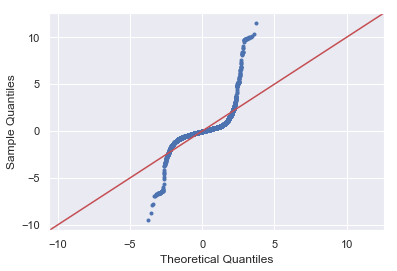

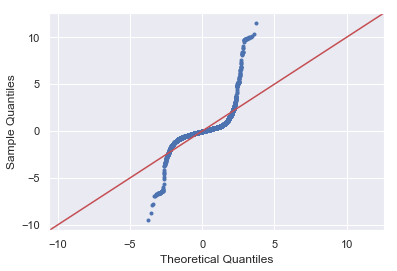

In [371]:
# Your code here - Check that the residuals are normally distributed
from statsmodels.graphics.gofplots import qqplot
import scipy
formula = 'list_price'+'~'+'+'.join(rel_params)
model = ols(formula=formula, data=data).fit()
qqplot(model.resid, dist=scipy.stats.norm, line='45', fit=True, ms=3)

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

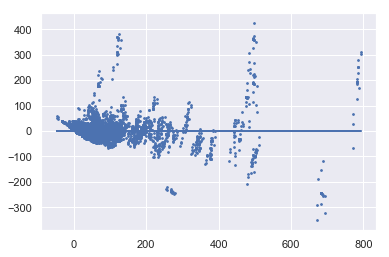

In [374]:
#Your code here - Check that the residuals are homoscedastic
plt.scatter(model.predict(data[rel_params]), model.resid, s=3)
plt.plot(model.predict(data[rel_params]), [0 for i in range(len(data))])

> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the list_price increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confiding the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least 2 additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

In [343]:
#Your code here - Check for outliers
for i in range (80,100):
    qutl = i/100
    print(f'The {i}% of list price is {data.list_price.quantile(qutl)}')
print(f'Max price for a toy is {data.list_price.max()}')

The 80% of list price is 90.986
The 81% of list price is 92.66216100000052
The 82% of list price is 97.5878
The 83% of list price is 101.898
The 84% of list price is 109.13971199999885
The 85% of list price is 110.352
The 86% of list price is 119.96492
The 87% of list price is 121.9878
The 88% of list price is 121.9878
The 89% of list price is 134.18779999999998
The 90% of list price is 143.952
The 91% of list price is 153.986
The 92% of list price is 170.7878
The 93% of list price is 182.9878
The 94% of list price is 198.7929
The 95% of list price is 220.03032999999942
The 96% of list price is 251.90543999999994
The 97% of list price is 292.7878
The 98% of list price is 359.88
The 99% of list price is 463.5878
Max price for a toy is 1104.87


In [345]:
#It seems that most toys fall under $300, let's rerun the model after removing outliers.
from sklearn.model_selection import train_test_split

data_new = data[data.list_price<=300]
print(f'pct_removed = {1-len(data_new)/len(data)}')
data_new.list_price = data_new.list_price.map(np.log) #Applying a log transformation
train, test = train_test_split(data_new)

#Refit model with subset features
predictors = '+'.join(rel_params)
formula = 'list_price' + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

pct_removed = 0.028886844526218924


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     410.8
Date:                Sat, 17 Aug 2019   Prob (F-statistic):               0.00
Time:                        12:55:47   Log-Likelihood:                -4576.6
No. Observations:                7917   AIC:                             9269.
Df Residuals:                    7859   BIC:                             9674.
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.5377      0.014    251.047      0.000       3.510       3.565
piece_count                                          0.8832      0.014     60.981      0.000       0.855       0.912
num_reviews                                         -0.0300      0.008     -3.595      0.000      -0.046      -0.014
play_star_rating                                     0.1344      0.007     20.638      0.000       0.122       0.147
star_rating                                         -0.0589      0.008     -7.131      0.000      -0.075      -0.043
val_star_rating                                     -0.1179      0.008    -15.712      0.000      -0.133      -0.103
ages_10_14                                           0.3229      0.107      3.013      0.003       0.113       0.533
ages_11_16                                          -0.5311      0.080     -6.633      0.000      -0.688      -0.374
ages_12_16                                          -0.7436      0.090     -8.271      0.000      -0.920      -0.567
ages_14plus                                          0.0686      0.059      1.162      0.245      -0.047       0.184
ages_2_5                                             0.5164      0.021     24.268      0.000       0.475       0.558
ages_5_12                                           -0.7164      0.031    -22.786      0.000      -0.778      -0.655
ages_6plus                                          -0.9419      0.070    -13.434      0.000      -1.079      -0.804
ages_6_12                                           -0.2011      0.020    -10.264      0.000      -0.239      -0.163
ages_7_12                                            0.0276      0.024      1.135      0.256      -0.020       0.075
ages_7_14                                           -0.0498      0.021     -2.333      0.020      -0.092      -0.008
ages_8plus                                           0.5435      0.056      9.717      0.000       0.434       0.653
ages_8_12                                            0.1612      0.031      5.182      0.000       0.100       0.222
ages_8_14                                            0.2314      0.022     10.310      0.000       0.187       0.275
ages_9plus                                           0.1976      0.121      1.631      0.103      -0.040       0.435
ages_9_12                                            0.2255      0.080      2.836      0.005       0.070       0.381
ages_9_14                                            0.2523      0.032      7.896      0.000       0.190       0.315
theme_name_BOOST                                     0.8850      0.116      7.641      0.000       0.658       1.112
theme_name_Blues_Helicopter_Pursuit      

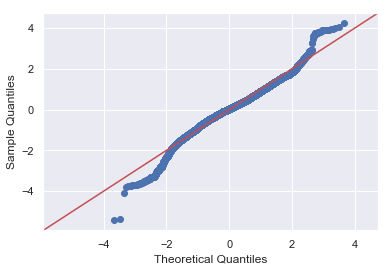

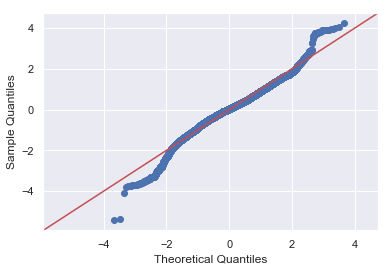

In [346]:
#Your code here - Check normality and homoscedasticity assumptions
qqplot(model.resid, dist=scipy.stats.norm, line='45', fit=True)

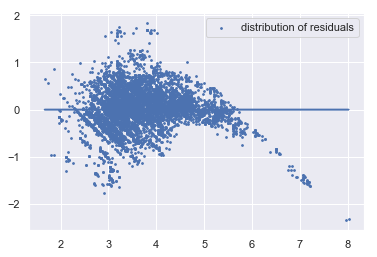

In [368]:
plt.scatter(model.predict(train[rel_params]), model.resid, s=3, label='distribution of residuals')
plt.plot(model.predict(train[rel_params]), [0 for i in range(len(train))])
plt.legend()

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches and make ongoing refinements. These choices depend on the context and specific use cases. 